<a href="https://colab.research.google.com/github/wjdgoruds2/Machine_Learning/blob/main/XOR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [30]:
pip install cvxopt

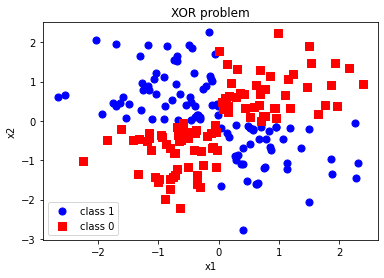

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: UserWarning: The following kwargs were not used by contour: 'xmap'
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: UserWarning: The following kwargs were not used by contour: 'xmap'
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: UserWarning: The following kwargs were not used by contour: 'xmap'
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: UserWarning: The following kwargs were not used by contour: 'xmap'
  # Remove the CWD from sys.path while we load stuff.


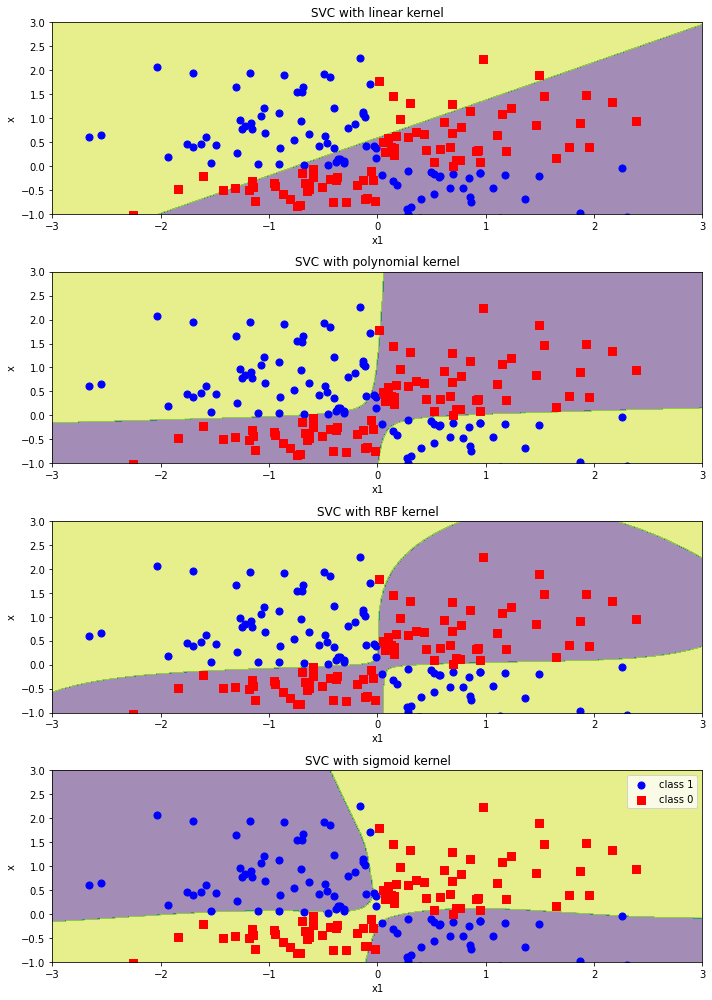

In [38]:
import numpy as np
import matplotlib as mpl
from matplotlib import pyplot as plt
from sklearn.svm import SVC


def plot_xor(X,y,model,title,xmin=-3,xmax=3,ymin=-1,ymax=3):
  XX,YY=np.meshgrid(np.arange(xmin,xmax,(xmax-xmin)/1000),np.arange(ymin,ymax,(ymax-ymin)/1000))
  ZZ=np.reshape(model.predict(np.array([XX.ravel(),YY.ravel()]).T),XX.shape)
  plt.contourf(XX,YY,ZZ,xmap=mpl.cm.Paired_r,alpha=0.5)
  plt.scatter(X[y==1,0],X[y==1,1],c='b',marker='o',label='class 1',s=50)
  plt.scatter(X[y==0,0],X[y==0,1],c='r',marker='s',label='class 0',s=50)
  plt.xlim(xmin,xmax)
  plt.ylim(ymin,ymax)
  plt.title(title)
  plt.xlabel("x1")
  plt.ylabel("x")

np.random.seed(0)
X_xor=np.random.randn(200,2)
y_xor=np.logical_xor(X_xor[:,0]>0,X_xor[:,1]>0)
y_xor=np.where(y_xor,1,0)
plt.scatter(X_xor[y_xor==1,0],X_xor[y_xor==1,1],c='b',marker='o',label='class 1',s=50)
plt.scatter(X_xor[y_xor==0,0],X_xor[y_xor==0,1],c='r',marker='s',label='class 0',s=50)
plt.legend()
plt.xlabel("x1")
plt.ylabel("x2")
plt.title("XOR problem")
plt.show()


svc=SVC(kernel="linear").fit(X_xor,y_xor)
polysvc=SVC(kernel="poly",degree=2,gamma=1,coef0=0).fit(X_xor,y_xor)
rbfsvc=SVC(kernel="rbf").fit(X_xor,y_xor)
sigmoidsvc=SVC(kernel="sigmoid",gamma=2,coef0=2).fit(X_xor,y_xor)

plt.figure(figsize=(10,14))
plt.subplot(411)
plot_xor(X_xor,y_xor,svc,"SVC with linear kernel")
plt.subplot(412)
plot_xor(X_xor,y_xor,polysvc,"SVC with polynomial kernel")
plt.subplot(413)
plot_xor(X_xor,y_xor,rbfsvc,"SVC with RBF kernel")
plt.subplot(414)
plot_xor(X_xor,y_xor,sigmoidsvc,"SVC with sigmoid kernel")
plt.tight_layout()
plt.legend()
plt.show()